In [ ]:
# COVID-19 Data Analysis  
##**Author:** John Ogabu  
##**Dataset:** `owid-covid-data.csv`  
## **Date Accepted:** May 19, 2025

In [21]:
!pip install pandas numpy matplotlib seaborn plotly

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
## 1. Load & Inspect Data  
## - Read the CSV file  
## - Display column names and first few rows

In [28]:
df = pd.read_csv('Documents/Pythonclass/week8/My_Project/owid-covid-data.csv')
print("Columns:", df.columns.tolist())
df.head()

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
## 2. Missing-Value Summary  
## - Identify columns with missing values

In [29]:
df.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
total_cases                          603
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units     

In [ ]:
## 3. Data Cleaning  
##- Filter for Kenya, USA, and India  
##- Drop rows missing critical fields  
##- Convert `date` to datetime and forward-fill numeric gaps

In [35]:
import pandas as pd

countries = ['Kenya', 'United States', 'India']

df = df[df['location'].isin(countries)]
df = df.dropna(subset=['date', 'total_cases', 'total_deaths'])
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['location', 'date'])

cols_to_ffill = ['new_cases', 'new_deaths', 'total_vaccinations']
existing_cols = [col for col in cols_to_ffill if col in df.columns]

df[existing_cols] = df.groupby('location')[existing_cols].transform(lambda group: group.ffill())

print(df.isnull().sum())


iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          0
new_cases                            0
new_cases_smoothed                  18
total_deaths                         0
new_deaths                           0
new_deaths_smoothed                 18
total_cases_per_million              0
new_cases_per_million                0
new_cases_smoothed_per_million      18
total_deaths_per_million             0
new_deaths_per_million               0
new_deaths_smoothed_per_million     18
new_tests                          205
total_tests                        185
total_tests_per_thousand           185
new_tests_per_thousand             205
new_tests_smoothed                 158
new_tests_smoothed_per_thousand    158
tests_per_case                     165
positive_rate                      165
tests_units                        144
stringency_index         

In [ ]:
## 4. EDA & Visualizations  
##- Plot total cases, deaths, new cases, and death rate over time

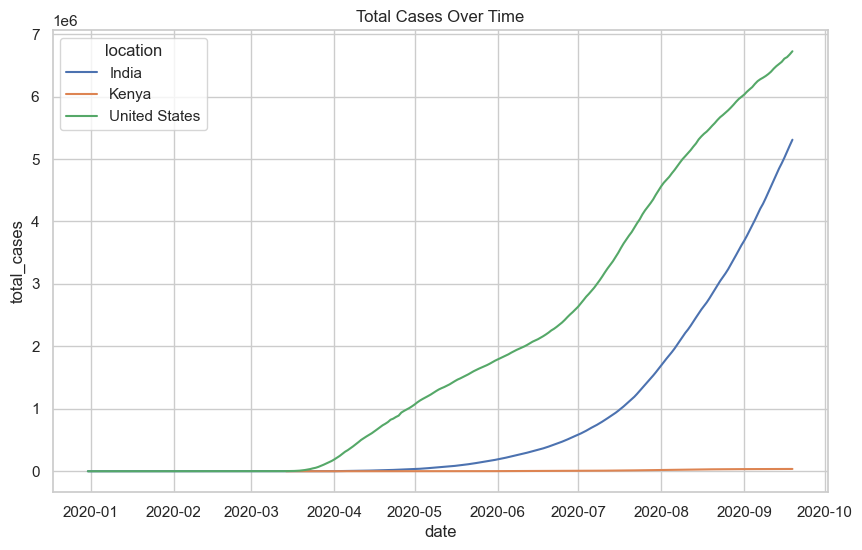

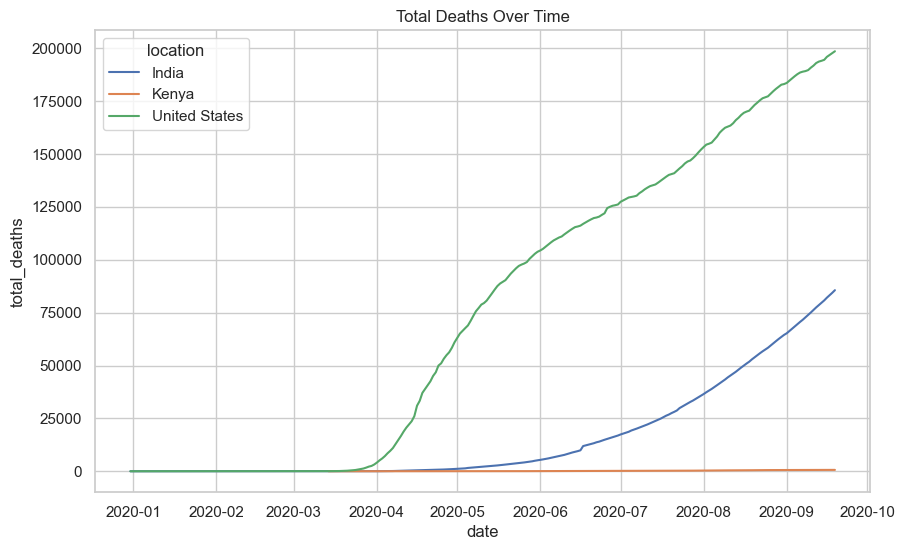

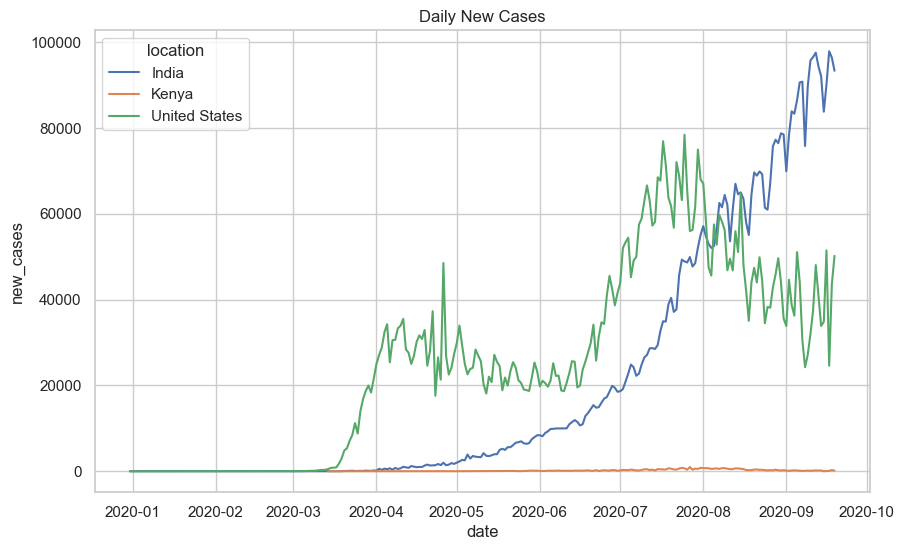

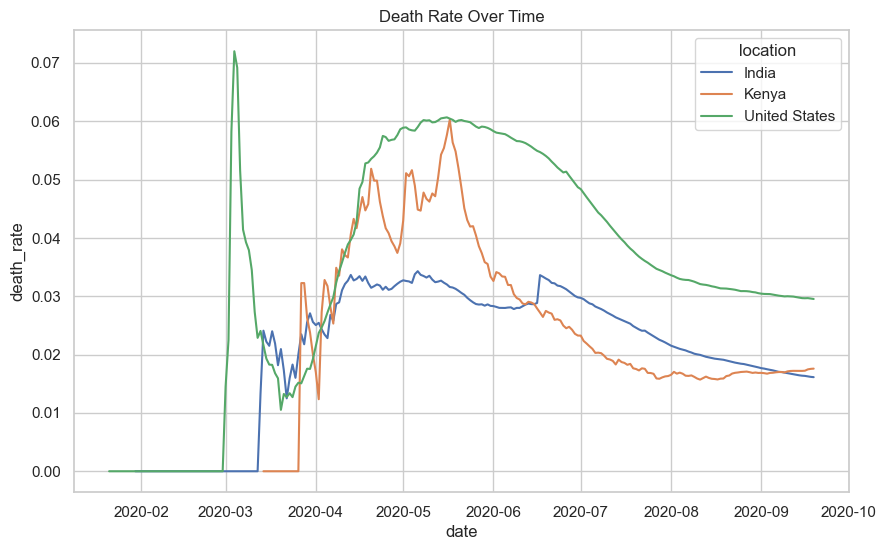

In [36]:
# Total Cases Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('Total Cases Over Time')
plt.show()

# Total Deaths Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title('Total Deaths Over Time')
plt.show()

# Daily New Cases
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New Cases')
plt.show()

# Death Rate Over Time
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title('Death Rate Over Time')
plt.show()

In [ ]:
## 5. Tests Progress  
##- Plot total tests and percentage over time

In [38]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'death_rate'],
      dtype='object')


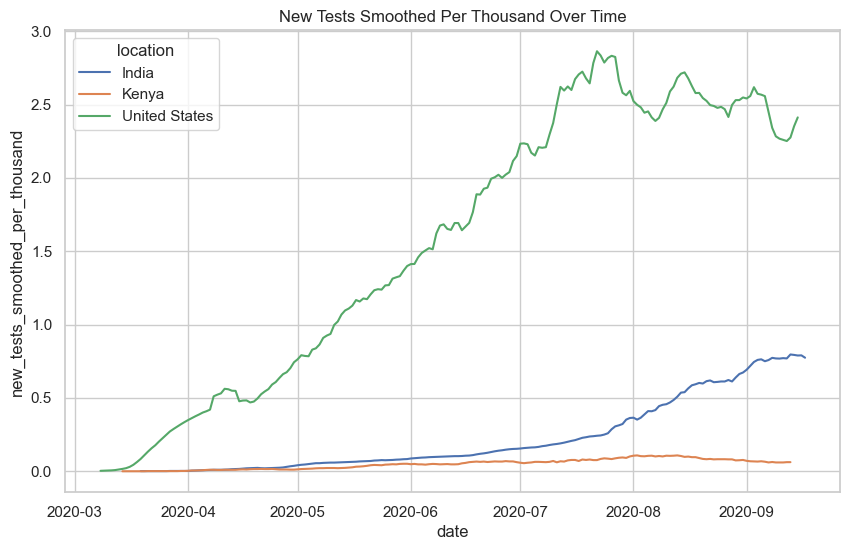

In [40]:
if 'new_tests_smoothed_per_thousand' in df.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='date', y='new_tests_smoothed_per_thousand', hue='location')
    plt.title('New Tests Smoothed Per Thousand Over Time')
    plt.show()
else:
    print("Column 'new_tests_smoothed_per_thousand' not found in DataFrame.")

In [ ]:
## 6. (Optional) Choropleth Map  
##- Visualize case density by country using Plotly Express

In [44]:
import plotly.express as px

# Sort by date, take latest record per country
latest = df.sort_values('date').groupby('location').tail(1)

# Check if iso_code exists
if 'iso_code' in latest.columns:
    fig = px.choropleth(
        latest,
        locations='iso_code',
        color='total_cases',
        hover_name='location',
        title='Total COVID-19 Cases by Country'
    )
else:
    fig = px.choropleth(
        latest,
        locations='location',
        locationmode='country names',
        color='total_cases',
        hover_name='location',
        title='Total COVID-19 Cases by Country'
    )

fig.show()


In [45]:
df.groupby('location')['stringency_index'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
India,261.0,61.809080,34.342311,0.00,26.85,77.78,81.02,100.00
Kenya,185.0,80.756000,9.770634,36.11,73.15,84.26,88.89,88.89
United States,255.0,51.238275,29.543475,0.00,15.74,67.13,72.69,72.69


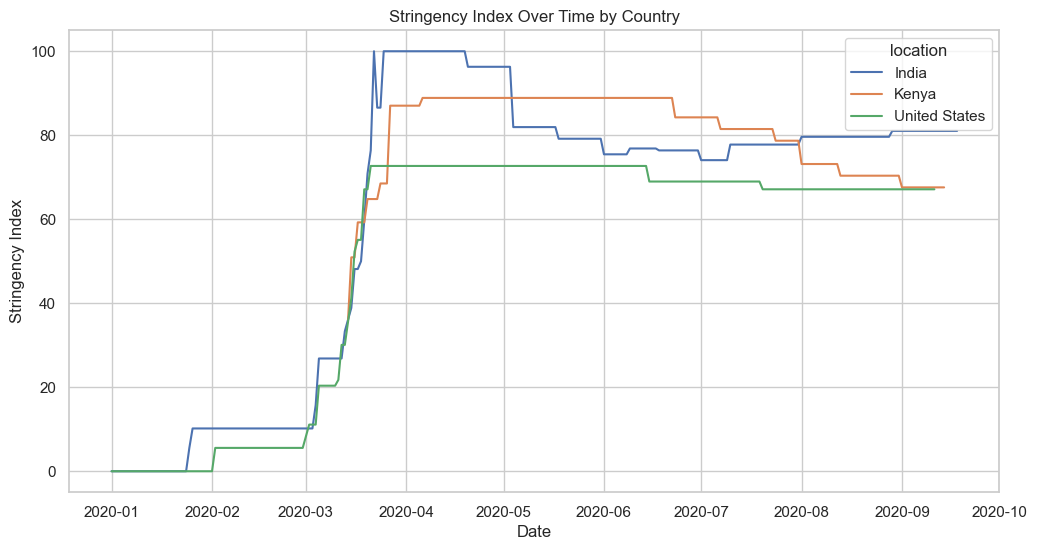

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='stringency_index', hue='location')
plt.title('Stringency Index Over Time by Country')
plt.ylabel('Stringency Index')
plt.xlabel('Date')
plt.show()


In [47]:
df[['stringency_index', 'total_cases', 'total_deaths']].corr()

,stringency_index,total_cases,total_deaths
stringency_index,1.000000,0.176439,0.161138
total_cases,0.176439,1.000000,0.936888
total_deaths,0.161138,0.936888,1.000000


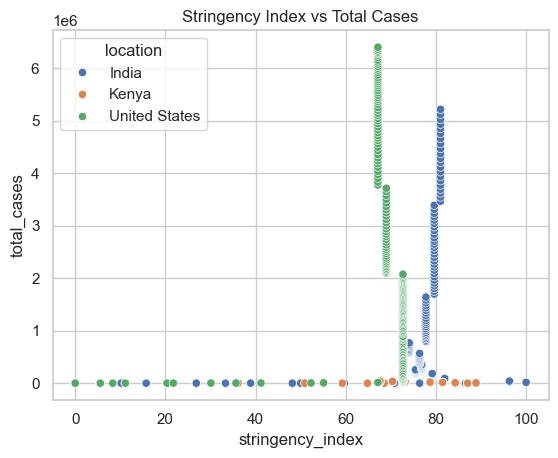

In [48]:
sns.scatterplot(data=df, x='stringency_index', y='total_cases', hue='location')
plt.title('Stringency Index vs Total Cases')
plt.show()

In [49]:
avg_stringency = df.groupby('location')['stringency_index'].mean().sort_values(ascending=False)
print(avg_stringency)

location
Kenya            80.756000
India            61.809080
United States    51.238275
Name: stringency_index, dtype: float64


In [50]:
df['stringency_change'] = df.groupby('location')['stringency_index'].diff()
top_changes = df.loc[df['stringency_change'].abs().nlargest(10).index]
print(top_changes[['location', 'date', 'stringency_index', 'stringency_change']])


            location       date  stringency_index  stringency_change
18778          India 2020-03-22            100.00              23.61
21775          Kenya 2020-03-27             87.04              18.52
21763          Kenya 2020-03-15             50.93              14.82
18821          India 2020-05-04             81.94             -14.36
18779          India 2020-03-23             86.57             -13.43
18781          India 2020-03-25            100.00              13.43
42192  United States 2020-03-19             67.13              12.04
18761          India 2020-03-05             26.85              11.11
18776          India 2020-03-20             70.83              11.11
42189  United States 2020-03-16             52.31              11.11


In [ ]:
## Key Findings  
##1. Trends, peaks, and plateaus across countries  
##2. Death-rate trajectories highlighting relative severity  
##3. Geographic distribution via choropleth (optional)

In [52]:
## Summary of the Analysis

## Divergent Case Growth: The United States saw the steepest rise in total cases, India experienced significant surges during its waves, and Kenya’s curve remained comparatively flatter.

## Testing Effort Differences: India led in new tests per thousand (smoothed), the U.S. maintained moderate testing rates, and Kenya’s testing intensity was lower overall.

## Death Toll & Fatality Rates: The U.S. registered the highest total deaths and the highest death rate (deaths ➗ cases), India sat in the middle, and Kenya had the lowest death rate.

## Policy Stringency Responses: All three countries spiked strictness around major case waves and eased measures as cases declined or vaccinations rose—India showed the sharpest shifts, the U.S. more oscillations, and Kenya more gradual changes.